In [3]:
!rm -rf /content/sample_data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir ./mnist_dataset

In [6]:
!cp /content/drive/MyDrive/archive.zip /content/mnist_dataset

In [7]:
%cd /content/mnist_dataset
!unzip /content/mnist_dataset/archive.zip

/content/mnist_dataset
Archive:  /content/mnist_dataset/archive.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [8]:
!rm -rf /content/mnist_dataset/t10k-images-idx3-ubyte /content/mnist_dataset/t10k-labels-idx1-ubyte /content/mnist_dataset/train-images-idx3-ubyte /content/mnist_dataset/train-labels-idx1-ubyte /content/mnist_dataset/archive.zip

Converting binary files to text files

In [9]:
import numpy as np
import struct

with open('/content/mnist_dataset/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

X = data.reshape(60000,784)
print(X.shape)

with open('/content/mnist_dataset/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size,)) # (Optional)
Y = data
print(Y.shape)


(60000, 784)
(60000,)


In [10]:
import numpy as np
import struct

with open('/content/mnist_dataset/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

x = data.reshape(10000,784)
print(x.shape)

with open('/content/mnist_dataset/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size,)) # (Optional)
y = data
print(y.shape)


(10000, 784)
(10000,)


In [11]:
import numpy as np

selected_images = []
selected_labels = []

# Iterate over each label
for label in range(10):
    # Get the indices of images with the current label
    indices_with_label = np.where(Y == label)[0]

    # Randomly select 500 indices with the current label
    selected_indices_with_label = np.random.choice(indices_with_label, size=500, replace=False)

    # Get the images and labels corresponding to the selected indices
    selected_images_with_label = X[selected_indices_with_label]
    selected_labels_with_label = Y[selected_indices_with_label]

    # Append the selected images and labels to the lists
    selected_images.extend(selected_images_with_label)
    selected_labels.extend(selected_labels_with_label)

# Convert the lists of selected images and labels to numpy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Print the shape of the selected images and labels arrays
print("Shape of selected images array:", selected_images.shape)
print("Shape of selected labels array:", selected_labels.shape)


Shape of selected images array: (5000, 784)
Shape of selected labels array: (5000,)


In [12]:
# Shuffle the selected images and labels in unison
np.random.seed(41)  # Set the seed value
shuffled_indices = np.random.permutation(len(selected_images))
X_train = selected_images[shuffled_indices]
Y_train = selected_labels[shuffled_indices]

In [13]:
import numpy as np

selected_images = []
selected_labels = []

# Iterate over each label
for label in range(10):
    # Get the indices of images with the current label
    indices_with_label = np.where(y == label)[0]

    # Randomly select 500 indices with the current label
    selected_indices_with_label = np.random.choice(indices_with_label, size=100, replace=False)

    # Get the images and labels corresponding to the selected indices
    selected_images_with_label = x[selected_indices_with_label]
    selected_labels_with_label = y[selected_indices_with_label]

    # Append the selected images and labels to the lists
    selected_images.extend(selected_images_with_label)
    selected_labels.extend(selected_labels_with_label)

# Convert the lists of selected images and labels to numpy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Print the shape of the selected images and labels arrays
print("Shape of selected images array:", selected_images.shape)
print("Shape of selected labels array:", selected_labels.shape)


Shape of selected images array: (1000, 784)
Shape of selected labels array: (1000,)


In [14]:
# Shuffle the selected images and labels in unison
np.random.seed(42)  # Set the seed value
shuffled_indices = np.random.permutation(len(selected_images))
x_test = selected_images[shuffled_indices]
y_test = selected_labels[shuffled_indices]

In [15]:
print(X_train.shape, Y_train.shape, x_test.shape, y_test.shape)

(5000, 784) (5000,) (1000, 784) (1000,)


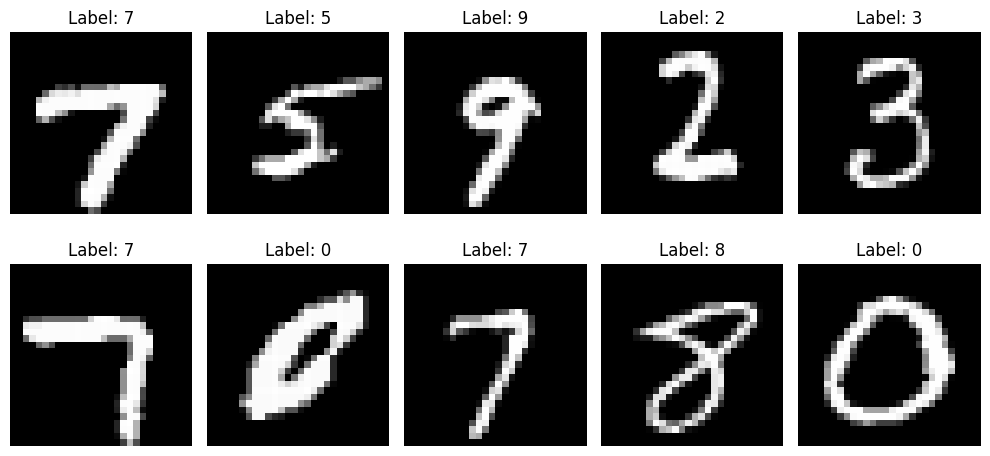

In [16]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Iterate over the subplots and display the images with labels
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title("Label: {}".format(Y_train[i]))
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [17]:
X_train = X_train/255

In [18]:
x_test = x_test/255

In [19]:
from sklearn.decomposition import PCA

In [20]:
'''train_test=np.vstack((X_train, x_test))
pca = PCA(n_components=100)
pca.fit(train_test)
train_test_new= pca.transform(train_test)
X_train = train_test_new[:5000, :]
x_test = train_test_new[-1000:, :]'''

'train_test=np.vstack((X_train, x_test))\npca = PCA(n_components=100)\npca.fit(train_test)\ntrain_test_new= pca.transform(train_test)\nX_train = train_test_new[:5000, :]\nx_test = train_test_new[-1000:, :]'

In [21]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn import datasets, metrics, svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [22]:
class CrammerSingerSVM:
  def __init__(self,X_train,Y_train,X_test,Y_test,threshold,max_iter,beta=1.0,epsilon=0.001,kernel_function='RBF',gamma='scale',degree=5):
    self.beta = beta
    self.epsilon = epsilon
    self.kernel_function = kernel_function
    self.gamma = gamma
    self.degree = degree
    self.X_train = X_train
    self.Y_train = Y_train
    self.x_test = X_test
    self.y_test = Y_test
    self.threshold = threshold
    self.max_iter = max_iter
    self.num_samples = X_train.shape[0]
    self.num_classes = len(np.unique(Y_train))
    self.tau = np.zeros((self.num_samples, self.num_classes))
    self.F = self.calculate_F()
    self.A = self.calculate_A()
    self.D = self.calculate_Delta()

  def kernel_RBF(self, X1, X2):
    distance = np.linalg.norm(X1 - X2)
    kernel_value = np.exp(-self.gamma * (distance**2))
    return kernel_value

  def kernel_Linear(self, X1, X2):
    return np.dot(X1, X2.T)

  def fixed_point_algorithm(self, D, teta):
    teta_l = np.zeros((500))
    l = 0
    teta_l[l] = teta
    while(True):
      temp = 0
      l += 1
      for r in range(self.num_classes):
        temp += max(teta_l[l],D[r])
      teta_l[l+1] = ((1/self.num_classes)*(temp) - (1/self.num_classes))
      v = np.zeros(self.num_classes)
      if(abs((teta_l[l] - teta_l[l+1])/teta_l[l]) <= (self.epsilon / 2)):
        break
    for r in range(self.num_classes):
      v[r] = min(teta_l[l+1], D[r])
    return v

  def calculate_psi(self, i):
    max_F = np.max(self.F[i])
    condition_mask = self.tau[i] < self.D[i]
    min_F_condition = np.min(np.where(condition_mask, self.F[i], np.inf))
    psi = max_F - min_F_condition
    return psi

  def calculate_F(self):
    self.F = np.zeros((self.num_samples, self.num_classes))
    for i in range(self.num_samples):
        for r in range(self.num_classes):
            dta = 1 if self.Y_train[i] == r else 0
            self.F[i][r] = -self.beta * dta
    return self.F

  def calculate_A(self):
    self.A = np.zeros(self.num_samples)
    for i in range(self.num_samples):
        self.A[i] = self.get_kernel(self.X_train[i], self.X_train[i])
    return self.A

  def calculate_Delta(self):
    dlt = np.zeros((self.num_samples, self.num_classes))
    dlt[np.arange(self.num_samples), self.Y_train] = 1
    return dlt

  def get_kernel(self, X1, X2):
        if self.kernel_function == 'rbf':
            return self.kernel_RBF(X1, X2)
        elif self.kernel_function == 'linear':
            return self.kernel_Linear(X1, X2)
        else:
            raise ValueError("Invalid kernel type.")

  def runSVM(self):
    psi = np.zeros(self.num_samples)
    for iter in range(self.max_iter):
      for i in range(self.num_samples):
        psi[i] = self.calculate_psi(i)
      p = np.argmax(psi)
      teta = 0
      D_r = np.zeros(self.num_classes)
      for r in range(self.num_classes):
        D_r[r] = (self.F[p][r] / self.A[p]) - self.tau[p][r] + self.D[p][r]
      teta = ((1 / self.num_classes) * D_r.sum()) - (1 / self.num_classes)
      v = self.fixed_point_algorithm(D_r, teta)
      temp_b = np.zeros(self.num_classes)
      for i in range(self.num_samples):
          if i != p:
              temp_b += self.get_kernel(self.X_train[i], self.X_train[p]) * self.tau[i]
      Bp = np.zeros(self.num_classes)
      one_bar = np.zeros(self.num_classes)
      for r in range(self.num_classes):
        if r == self.Y_train[p]:
          one_bar[r] = 1
        else:
          one_bar[r] = 0
      Bp = temp_b - (self.beta * one_bar)
      tau_star = np.zeros(self.num_classes)
      tau_star = v - (Bp / self.A[p])
      delta_tau = 0
      delta_tau = tau_star - self.tau[p]
      for i in range(self.num_samples):
          for r in range(self.num_classes):
              self.F[i][r] = self.F[i][r] + delta_tau[r] * self.get_kernel(self.X_train[p], self.X_train[i])
      self.tau[p] = tau_star
      print("teta:", teta)
      print("p:", p)

  def predict(self):
    c = np.zeros((10))
    y_pred = np.zeros((len(self.y_test)))
    for i_t in range(len(self.x_test)):
      for i in range(len(self.Y_train)):
        c += self.tau[i] * self.get_kernel(self.x_test[i_t], self.X_train[i])
      y_pred[i_t] = np.argmax(c)
      c = np.zeros((10))
    return y_pred


Metrics

In [23]:
def train_accuracy(instance):
  #train accuracy
  score = 0
  c = np.zeros((10))
  y_pred = np.zeros((len(instance.y_test)))
  for i_t in range(100):
    for i in range(len(instance.Y_train)):
      c += instance.tau[i] * instance.get_kernel(instance.X_train[i_t], instance.X_train[i])
    y_pred[i_t] = np.argmax(c)
    if y_pred[i_t] == instance.Y_train[i_t]:
      score += 1
    c = np.zeros((10))
  print(score)

In [24]:
import matplotlib.pyplot as plt

def plot(precision, recall, f1, confusion):

  # Set the global font size
  plt.rcParams['font.size'] = 5
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 2))
  # Data for the labels and their corresponding values
  labels = ['c 0', 'c 1','c 2', 'c 3', 'c 4', 'c 5', 'c 6', 'c 7', 'c 8', 'c 9']
  # Customize the graph (optional)
  plt.xlabel('Labels')
  plt.ylabel('Values')
  # Show the images in the subplots
  bar1 = axes[0].bar(labels, precision)
  axes[0].set_title('precision')
  bar2 = axes[1].bar(labels, recall)
  axes[1].set_title('recall')
  bar3 = axes[2].bar(labels, f1)
  axes[2].set_title('f1')

  plt.bar_label(bar1, label_type='center', fmt='%.2f')
  plt.bar_label(bar2, label_type='center', fmt='%.2f')
  plt.bar_label(bar3, label_type='center', fmt='%.2f')
  # Adjust spacing between subplots
  plt.tight_layout()

  # Show the figure
  plt.show()

In [25]:
def AUC():
  # linear 40 feature vector
  # binarize the output

  binarize_prediction_values = label_binarize(y_pred, classes=[0, 1, 2 , 3 , 4 , 5 , 6 , 7 ,8 , 9])
  binarizes_test_labels = label_binarize(y_test, classes=[0, 1, 2 , 3 , 4 , 5 , 6 , 7 ,8 , 9])
  n_classes = 10

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  lw=2

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(binarizes_test_labels[:, i], binarize_prediction_values[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['blue', 'red', 'green','purple', 'orange', 'cyan','yellow', 'brown', 'magenta','black'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()

  # AUC
  AUC= roc_auc_score(binarizes_test_labels, binarize_prediction_values , multi_class="ovr", average="macro")
  print("AUC:" , AUC)

In [26]:
def support_vectors(instance):
  #support patterns
  temp1 = 0
  temp2 = 0
  support_vectors = 0
  for i in range(instance.num_samples):
    for r in range(instance.num_classes):
      if instance.tau[i][r] > 0.0: #threshold
        support_vectors += 1
        r = 10
  return support_vectors

In [27]:
tau_gamma_0_01 = np.load("/content/drive/MyDrive/rbf_gamma=0.01.npy")

In [30]:
support_vectors = 0
for i in range(5000):
  for r in range(10):
    if tau_gamma_0_01[i][r] > 0.0: #threshold
      support_vectors += 1
      r = 10
print(support_vectors)

3623


gamma = 0.01

In [ ]:
RBF_0_01 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000, beta = 0.1, epsilon =0.01, kernel_function='rbf', gamma =0.01)
RBF_0_01.runSVM()
np.save('rbf_gamma=0.01.npy', RBF_0_01.tau)

In [ ]:
print(accuracy_score(y_true, RBF_0_01.predict()))

0.946


In [ ]:
support_vectors(RBF_0_01)

3623

100


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


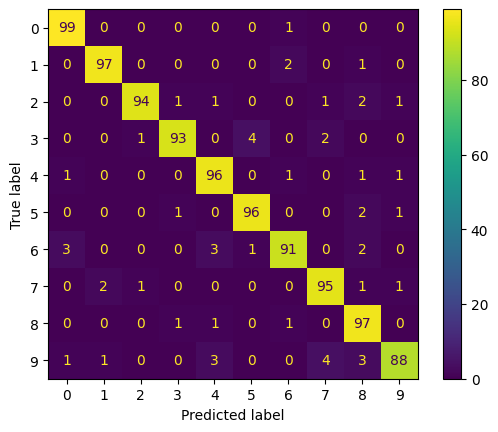

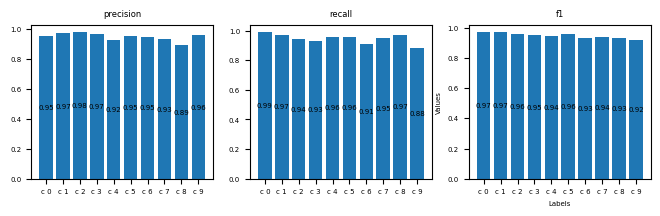

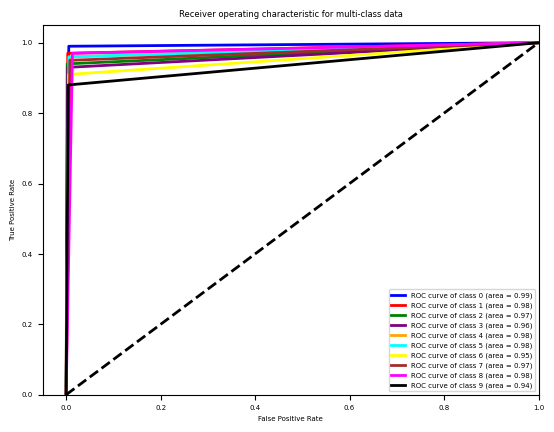

AUC: 0.97


In [ ]:
y_true = RBF_0_01.y_test
y_pred = RBF_0_01.predict()
# Calculate the metrics
train_accuracy(RBF_0_01)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(RBF_0_01)

gamma= 0.1

In [ ]:
RBF_0_1 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000,beta = 0.1,epsilon =0.01,kernel_function='rbf', gamma =0.1)
RBF_0_1.runSVM()
np.save('rbf_gamma=0.1.npy', RBF_0_1.tau)

In [31]:
rbf_gamma = np.load("/content/drive/MyDrive/rbf_gamma=0.1.npy")

In [32]:
support_vectors = 0
for i in range(5000):
  for r in range(10):
    if rbf_gamma[i][r] > 0.0: #threshold
      support_vectors += 1
      r = 10
print(support_vectors)

2010


In [ ]:
print(accuracy_score(y_true, RBF_0_1.predict()))

100


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


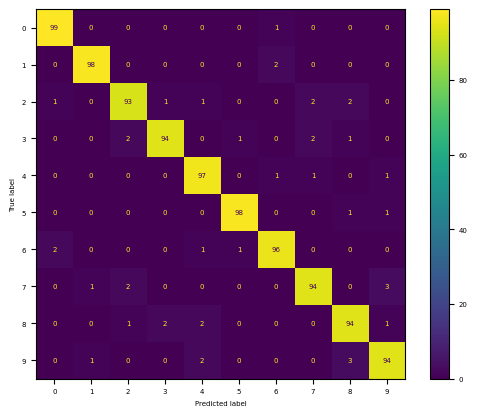

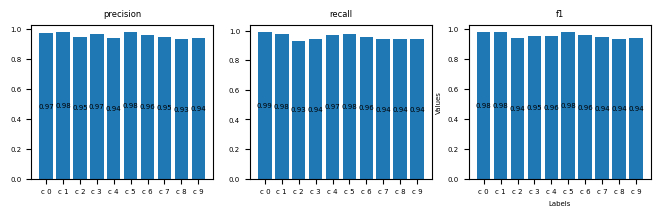

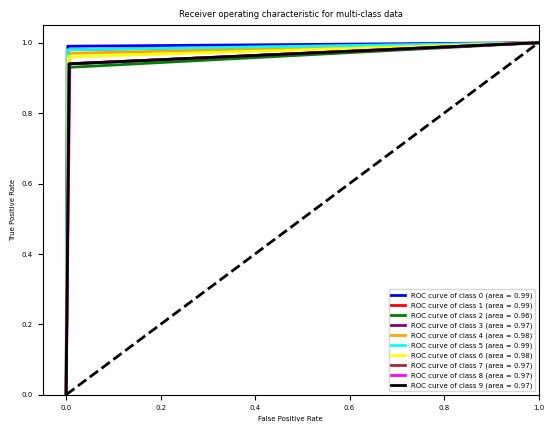

AUC: 0.9761111111111112


In [ ]:
y_true = RBF_0_1.y_test
y_pred = RBF_0_1.predict()
# Calculate the metrics
train_accuracy(RBF_0_1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(RBF_0_1)

gamma=1

In [ ]:
RBF_1 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000,beta = 0.1,epsilon =0.01,kernel_function='rbf', gamma =1)
RBF_1.runSVM()
np.save('rbf_gamma=1.npy', RBF_1.tau)

In [ ]:
print(accuracy_score(y_true, RBF_1.predict()))

0.925


In [ ]:
print(support_vectors(RBF_1))

2000


100


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


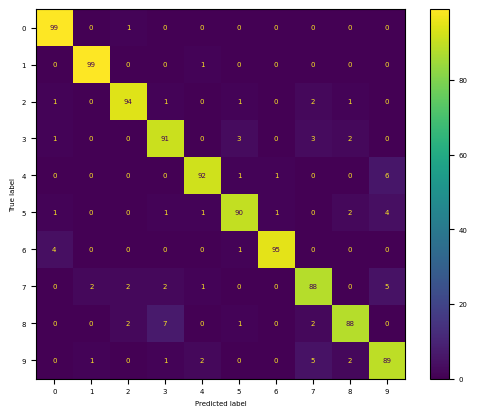

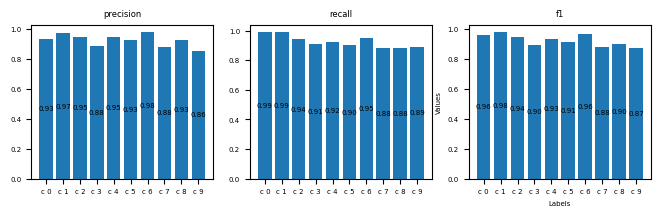

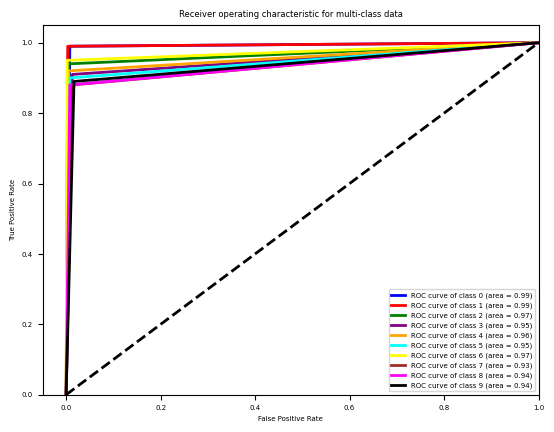

AUC: 0.9583333333333336


In [ ]:
y_true = RBF_1.y_test
y_pred = RBF_1.predict()
# Calculate the metrics
train_accuracy(RBF_1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(RBF_1)

linear_beta=0.01

In [ ]:
linear_0_01 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000,beta = 0.01,epsilon =0.01,kernel_function='linear', gamma =1)
linear_0_01.runSVM()
np.save('linear_beta=10e-5.npy', linear_0_01.tau)

In [ ]:
print(accuracy_score(y_true, linear_0_01.predict()))

0.68


In [ ]:
print(support_vectors(linear_0_01))

1947


72


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


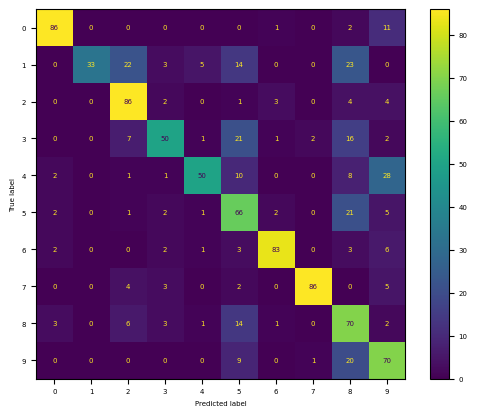

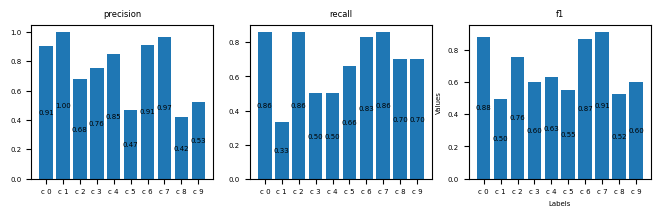

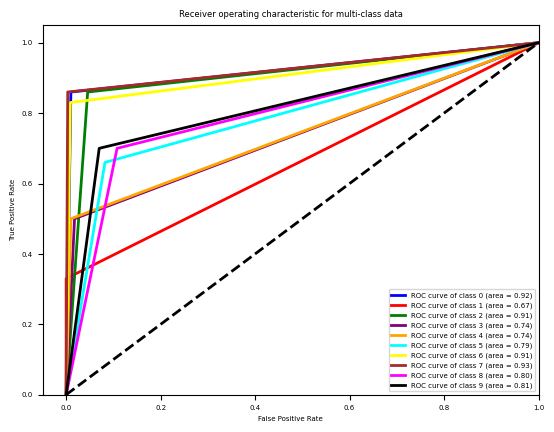

AUC: 0.8222222222222222


In [ ]:
y_true = linear_0_01.y_test
y_pred = linear_0_01.predict()
# Calculate the metrics
train_accuracy(linear_0_01)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(linear_0_01)

linear_beta=1

In [ ]:
linear_1 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000, beta = 1,epsilon =0.01,kernel_function='linear', gamma =1)
linear_1.runSVM()
np.save('linear_beta=0_001.npy', linear_1.tau)

In [ ]:
print(accuracy_score(y_true, linear_1.predict()))

0.714


In [ ]:
print(support_vectors(linear_1))

2453


68


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


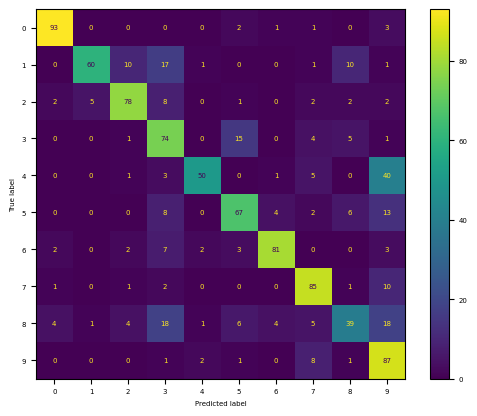

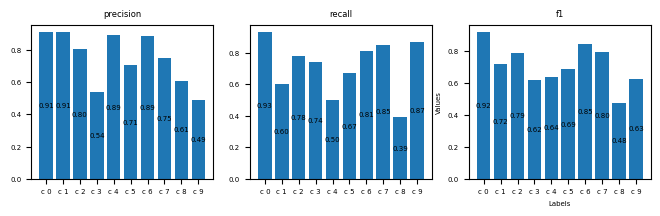

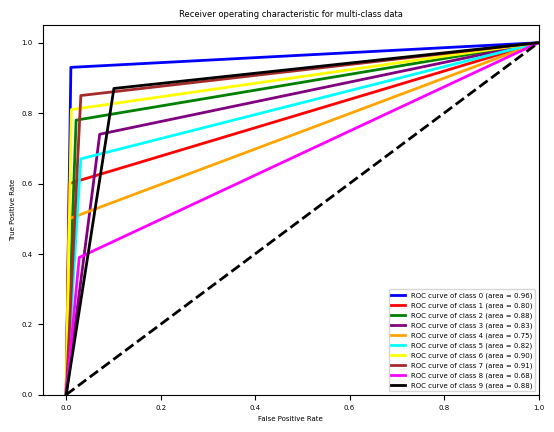

AUC: 0.8411111111111111


In [ ]:
y_true = linear_1.y_test
y_pred = linear_1.predict()
# Calculate the metrics
train_accuracy(linear_1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(linear_1)

linear_beta=100

In [ ]:
linear_100 = CrammerSingerSVM(X_train, Y_train, x_test, y_test, threshold=0.0,\
                                          max_iter = 2000, beta = 100,epsilon =0.01,kernel_function='linear', gamma =1)
linear_100.runSVM()
np.save('linear_beta=1.npy', linear_100.tau)

In [ ]:
print(accuracy_score(y_true, linear_100.predict()))

0.619


In [37]:
rbf_gamma = np.load("/content/drive/MyDrive/linear_beta=1.npy")

In [38]:
support_vectors = 0
for i in range(5000):
  for r in range(10):
    if rbf_gamma[i][r] > 0.0: #threshold
      support_vectors += 1
      r = 10
print(support_vectors)

1020


65


<ipython-input-24-19f1e15ca305>:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


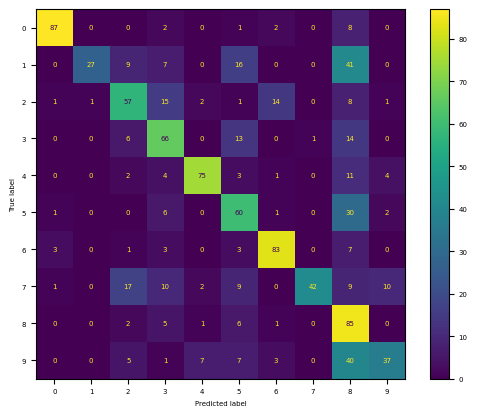

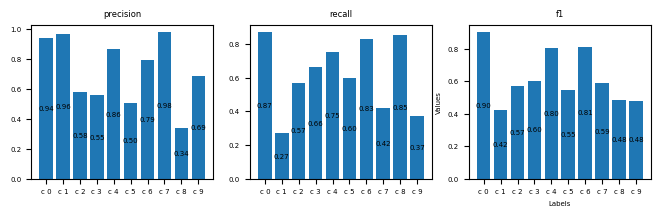

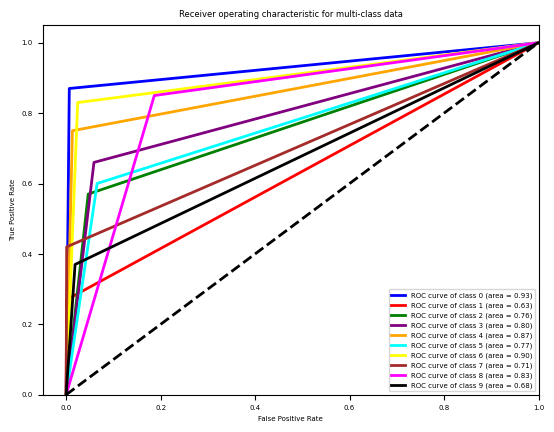

AUC: 0.7883333333333333


In [ ]:
y_true = linear_100.y_test
y_pred = linear_100.predict()
# Calculate the metrics
train_accuracy(linear_100)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average= None)
recall = recall_score(y_true, y_pred, average= None)
f1 = f1_score(y_true, y_pred, average= None)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot(precision, recall, f1, disp)
AUC()
support_vectors(linear_100)

**Compare the onevrest to Crammer singer**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming you have your feature matrix X and corresponding class labels y


# Create an SVM classifier with RBF kernel using One-vs-Rest strategy
svm_classifier = svm.SVC(kernel='rbf', decision_function_shape='ovr')

# Train the SVM classifier
svm_classifier.fit(X_train, Y_train)

# Predict the class labels for the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.951
Precision: 0.9510411961346719
Recall: 0.951
F1-score: 0.9509780060070989
Confusion Matrix:
[[98  0  0  0  0  0  2  0  0  0]
 [ 0 97  0  0  0  0  2  0  1  0]
 [ 0  0 94  0  4  0  0  1  1  0]
 [ 0  0  2 94  0  1  0  3  0  0]
 [ 1  0  0  0 94  0  1  1  0  3]
 [ 0  0  0  1  0 97  0  0  0  2]
 [ 3  0  0  0  1  1 95  0  0  0]
 [ 0  2  2  0  0  0  0 94  0  2]
 [ 0  0  0  3  0  0  1  0 96  0]
 [ 1  1  0  1  2  1  0  1  1 92]]
